In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [14]:
df = pd.read_csv('tested.csv')

In [16]:
print("First 5 Rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

First 5 Rows:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 ent

In [36]:

df['Age_ffill'] = df['Age'].ffill()
df['Age_bfill'] = df['Age'].bfill()


In [38]:
df['Cabin'] = df['Cabin'].fillna(value='unknown', limit=5)

In [40]:
df = df.drop_duplicates()

In [42]:
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])

In [44]:
scaler = StandardScaler()
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']])

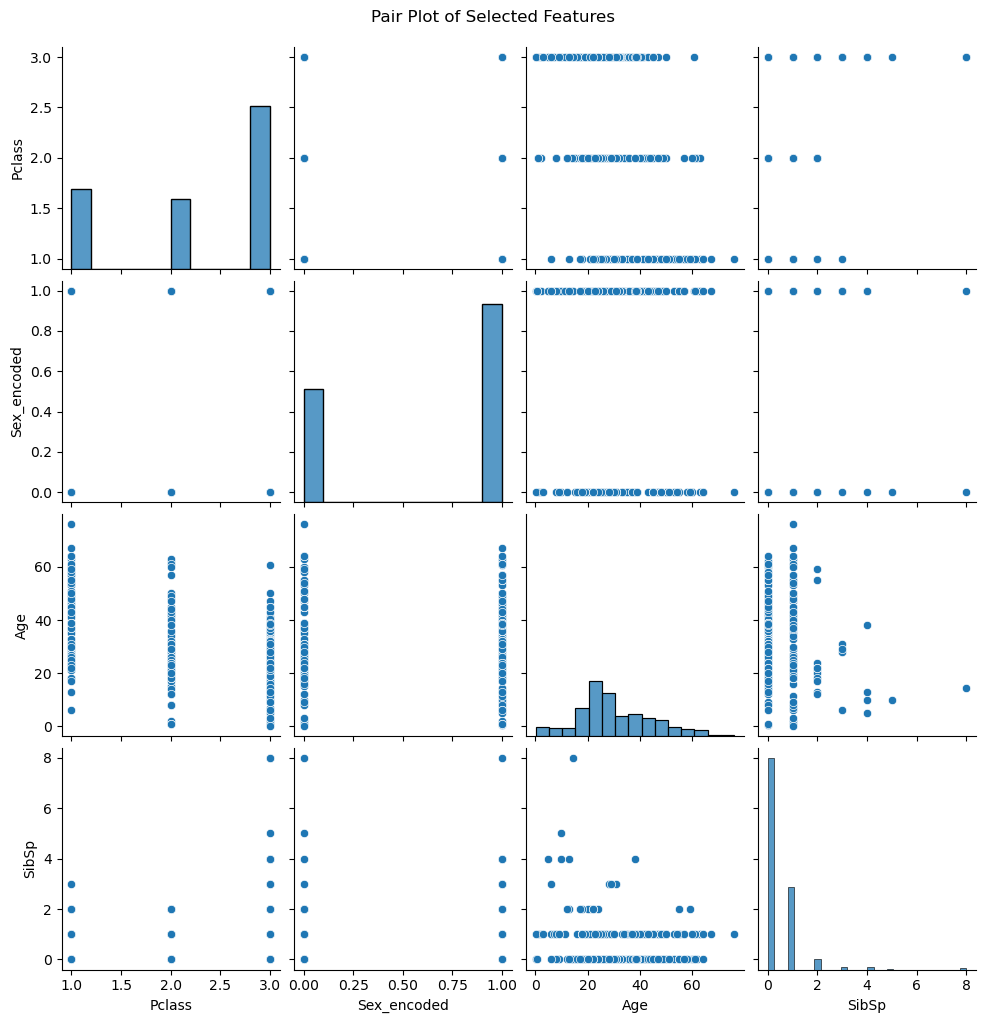

In [46]:
sns.pairplot(df[['Pclass', 'Sex_encoded', 'Age', 'SibSp']])
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

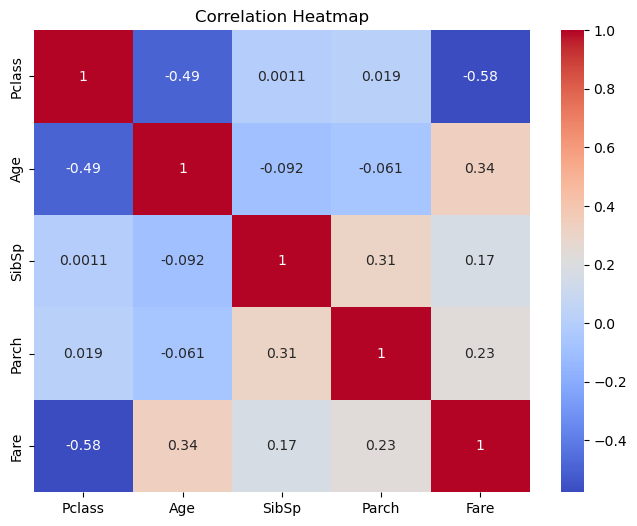

In [47]:
corr_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
plt.figure(figsize=(8, 6))
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()